In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance



In [2]:
number_of_features = 35

In [3]:
def characterize_centroids(df):
    # Create a new dataframe to store the characterization of each centroid
    characterization = pd.DataFrame(columns=['1st_highest_feature', '2nd_highest_feature', '3rd_highest_feature','4th_highest_feature','5th_highest_feature','6','7','8','9','10','11','12','13','14','15','16'])

    # Iterate over each centroid
    for centroid in df.index:
        # Get the features of the centroid sorted by their values in descending order
        sorted_features = df.loc[centroid].sort_values(ascending=False)

        # Get the first 3 highest features
        highest_features = sorted_features.index[:16]

        # Add the highest features to the characterization dataframe
        characterization.loc[centroid] = highest_features

    return characterization

In [22]:
def normalize_user_entries(user):
    number_of_features = user.shape[1]-2
    """Normalize user entries with respect to the total number of articles read."""
    total_articles = user.iloc[0, 0:number_of_features].sum()
    if total_articles > 0:
        normalized_user = user.copy()
        normalized_user.iloc[0, 0:number_of_features] = normalized_user.iloc[0, 0:number_of_features] / total_articles
        return normalized_user
    else:
        return user

In [3]:
clustering_model = pickle.load(open("kmeans_10_PCA.pkl", "rb"))
#The clustering is made on the 10 D dataset after applying PCA
#So either we apply PCA to the input or we add it to the centroids and compute the distance

c:\Users\laura.finarell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
#Upload the centroids with the original features
centroids = pd.read_csv('Centers.csv')

In [7]:
centroids.drop(['index','User_IP'],axis=1,inplace=True)

In [64]:
centroids.to_excel('centrixlsx.xlsx')

In [9]:
centroids = centroids.iloc[:, :35]

In [39]:
centroids

,culture ANALYSIS,culture DIVERT,culture EDUCATE,culture INSPIRE,culture TREND,culture UPDATE,economie ANALYSIS,economie EDUCATE,economie INSPIRE,economie TREND,...,sport EDUCATE,sport INSPIRE,sport TREND,sport UPDATE,suisse ANALYSIS,suisse DIVERT,suisse EDUCATE,suisse INSPIRE,suisse TREND,suisse UPDATE
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000194,0.000403,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.057390,0.127084,0.056137,0.247955,0.000555,0.501014,0.262395,0.036172,0.000034,0.000776,...,0.000006,0.001233,0.000000,0.803049,0.210238,0.000029,0.002756,0.059301,0.030523,0.816939
2,0.031606,0.073681,0.017227,0.098818,0.002677,0.206011,0.183633,0.015748,0.001708,0.005353,...,0.000000,0.000000,0.000000,0.102888,0.154601,0.004565,0.013399,0.023413,0.026603,0.419571
3,0.005143,0.041706,0.004585,0.041078,0.000000,0.219309,0.098165,0.014537,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.041775,0.106878,0.000000,0.000000,0.033550,0.012934,0.334458
4,0.000000,0.000778,0.000000,0.000409,0.000027,0.003931,0.000809,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000034,0.019311,0.001366,0.000055,0.000088,0.000023,0.000104,0.005547
5,0.000000,0.001433,0.000821,0.001975,0.000000,0.007048,0.004753,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003106,0.008217,0.000000,0.000891,0.002269,0.002452,0.018426
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000403,0.000055,0.001433,0.000000,0.001261,0.003571,0.000124,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.004707,0.002176,0.000000,0.000164,0.000821,0.000335,0.005350


In [9]:
print(characterize_centroids(centroids))

  1st_highest_feature 2nd_highest_feature 3rd_highest_feature  \
0   economie ANALYSIS     suisse ANALYSIS        sport UPDATE   
1        monde UPDATE       suisse UPDATE        sport UPDATE   
2        monde UPDATE       suisse UPDATE      culture UPDATE   
3        monde UPDATE       suisse UPDATE      culture UPDATE   
4        sport UPDATE        monde UPDATE       suisse UPDATE   
5        monde UPDATE       suisse UPDATE     suisse ANALYSIS   
6       sport EDUCATE    culture ANALYSIS       sport INSPIRE   
7       suisse UPDATE        sport UPDATE        monde UPDATE   

      4th_highest_feature     5th_highest_feature                      6  \
0        culture ANALYSIS           sport EDUCATE  sciences-tech INSPIRE   
1          culture UPDATE  sciences-tech ANALYSIS      economie ANALYSIS   
2         economie UPDATE       economie ANALYSIS         monde ANALYSIS   
3  sciences-tech ANALYSIS         suisse ANALYSIS      economie ANALYSIS   
4          culture UPDATE  science

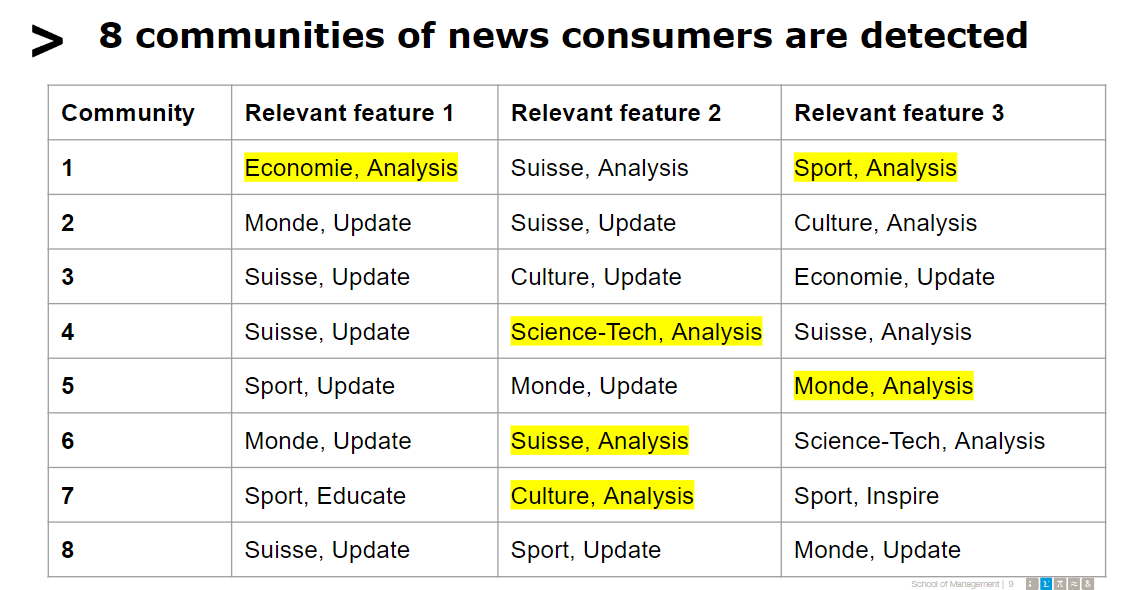

## ASSOCIATION TO BE IMPROVED AND AUTOMATIZED THE COMMUNITY CHARACTERIZATION, USING THE DEFINED FUNCTION

In [ ]:
def pipeline(user, centroids, characterize_centroids):
    """Recommend articles based on user profile and clustering centroids."""
    rec_articles = []
    target_comm = -1
    number_of_features = user.shape[1]-2
    
    # Normalize user entries
    user = normalize_user_entries(user)

    print('Cluster assignment')
    
    # Append user data to centroids and calculate distances
    df_augmented = pd.concat([centroids, pd.DataFrame(user.iloc[0, 0:number_of_features]).transpose()], ignore_index=True)
    distances = df_augmented.apply(lambda row: distance.euclidean(row, user.iloc[0, 0:number_of_features]), axis=1)
    distances = distances.iloc[:-1]
    
    # Find the nearest cluster
    min_distance_index = distances.idxmin()
    print('The user belongs to cluster ' + str(min_distance_index + 1))
    
    # Determine target community based on nudging flags and favorite topics
    if (user.loc[0, 'Flag_Nudging'] == 1) and (user.loc[0, 'Favourite_Topic'] is None or user.loc[0, 'Favourite_Topic'] == 'suisse'):
        print('Hard nudging')
        target_comm = 5  # Suisse analysis
    elif (user.loc[0, 'Flag_Nudging'] == 1) and (user.loc[0, 'Favourite_Topic'] is not None):
        print('Soft nudging towards ' + user.loc[0, 'Favourite_Topic'])
        favorite_topic = user.loc[0, 'Favourite_Topic']
        topic_to_comm = {
            'sport': 0,
            'economie': 0,
            'culture': 6,
            'science-tech.': 3,
            'monde': 4
        }
        target_comm = topic_to_comm.get(favorite_topic, -1)
    
    # If no nudging is required, recommend discovery content
    if target_comm == -1:
        print('Discovery content')
        max_distance_index = distances.idxmax()
        rec_articles.append(characterize_centroids(centroids).iloc[max_distance_index, 0])
    else:
        sorted_distances = distances.sort_values()
        path_to_target = sorted_distances.index[(sorted_distances.index <= target_comm) & (sorted_distances.index > min_distance_index)]
        for index in path_to_target:
            rec_articles.append(characterize_centroids(centroids).iloc[index, 0])
            if user.loc[0, 'Favourite_Topic'] is None or user.loc[0, 'Favourite_Topic'] == 'suisse':
                rec_articles.append('suisse, ANALYSIS')
            else:
                rec_articles.append(user.loc[0, 'Favourite_Topic'] + ', ANALYSIS')
    
    return rec_articles


In [111]:
#OLD
def pipeline(user): #user entries must be normalized with respect to the total number of articles read
    rec_articles = []
    target_comm = -1
    number_of_features = user.shape[1]-2
    print('Cluster assegnation')
    
    df_augmented = pd.concat([centroids,pd.DataFrame(user.iloc[0,0:35]).transpose()],ignore_index=True)
    distances = df_augmented.apply(lambda row: distance.euclidean(row, user.iloc[0,0:number_of_features]), axis=1)
    distances = distances.iloc[:-1]
    #print(distances)
    min_distance_index = distances.idxmin()
    #dist_array = distances.values
    #predicted_cluster = clustering_model.predict(user[1:36]) 
    print('The user belongs to cluster '+str(min_distance_index+1))
    if ((user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] is None)) or ((user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] == 'suisse')):
        print('Hard nudging')
        target_comm = 5 #suisse ANALYISIS
    elif (user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] is not None):
        print('Soft nundging towards '+user.loc[0,'Favourite_Topic'])
        if user.loc[0,'Favourite_Topic'] == 'sport' or user.loc[0,'Favourite_Topic'] == 'economie':
            target_comm = 0
        elif user.loc[0,'Favourite_Topic'] == 'culture': 
            target_comm = 6   
        elif user.loc[0,'Favourite_Topic'] == 'science-tech.': 
            target_comm = 3
        elif user.loc[0,'Favourite_Topic'] == 'monde':    
            target_comm = 4

    else:
        print('Discovery content')    
        max_distance_index = distances.idxmax()
        rec_articles.append(characterize_centroids(centroids).iloc[max_distance_index,0])
    
    if target_comm != -1:
        sorted_distances = distances.sort_values()
        #print(sorted_distances)
        path_to_target = sorted_distances.index[(sorted_distances.index <= target_comm) & (sorted_distances.index > min_distance_index)]
        for index in path_to_target:
            rec_articles.append(characterize_centroids(centroids).iloc[index, 0])
            if ((user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] is None)) or ((user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] == 'suisse')): 
                rec_articles.append('suisse, ANALYSIS')
            elif (user.loc[0,'Flag_Nudging'] == 1) & (user.loc[0,'Favourite_Topic'] is not None) & (user.loc[0,'Favourite_Topic'] != 'suisse'):    
                rec_articles.append(user.loc[0,'Favourite_Topic']+', ANALYSIS')
    return rec_articles

In [11]:
user = pd.DataFrame(np.zeros((1, len(centroids.columns))), columns=centroids.columns)

In [12]:
user.loc[0,'sport UPDATE'] = 15/29
user.loc[0,'sport INSPIRE'] = 7/29
user.loc[0,'culture ANALYSIS'] = 6/29
user.loc[0,'suisse ANALYSIS'] = 1/29

In [18]:
user['Flag_Nudging'] = 0

In [19]:
user['Favourite_Topic'] = 'culture'

In [20]:
user

,culture ANALYSIS,culture DIVERT,culture EDUCATE,culture INSPIRE,culture TREND,culture UPDATE,economie ANALYSIS,economie EDUCATE,economie INSPIRE,economie TREND,...,sport TREND,sport UPDATE,suisse ANALYSIS,suisse DIVERT,suisse EDUCATE,suisse INSPIRE,suisse TREND,suisse UPDATE,Flag_Nudging,Favourite_Topic
0,0.206897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.517241,0.034483,0.0,0.0,0.0,0.0,0.0,0,culture


In [127]:
pipeline(user)

Cluster assegnation
The user belongs to cluster 5
Discovery content


['monde UPDATE']

##TO DO
When we will have the topic for all articles. Given the rec_articles, we can retrieve one with the given features (from all the possibile, we choose one randomly and we return the ID and title for example)